In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

In [ ]:
def corr_2d(X,K):
    h,w=K.shape
    Y=torch.zeros([X.shape[0]-h+1,X.shape[1]-w+1])
    print("shape of input: ",X.shape)
    print("shape of kernel: ",K.shape)
    print("shape of output: ",Y.shape)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j]=(X[i:i+h,j:j+w]*K).sum()
    return Y

In [ ]:
X=torch.tensor([[0,1,2],[3,4,5],[6,7,8]],dtype=torch.float32)
K=torch.tensor([[0,1],[2,3]],dtype=torch.float32)
print(corr_2d(X,K))

shape of input:  torch.Size([3, 3])
shape of kernel:  torch.Size([2, 2])
shape of output:  torch.Size([2, 2])
tensor([[19., 25.],
        [37., 43.]])


Object Edge Detection in images

In [ ]:
X=torch.ones((6,8),dtype=torch.float32)
X[:,2:6]=0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
K=torch.tensor([[1,-1]],dtype=torch.float32)
K


tensor([[ 1., -1.]])

In [ ]:
Y=corr_2d(X,K)
print(Y)

shape of input:  torch.Size([6, 8])
shape of kernel:  torch.Size([1, 2])
shape of output:  torch.Size([6, 7])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


Learning a kernel

In [ ]:
conv2d=nn.LazyConv2d(1,kernel_size=(1,2),bias=False)
X=X.reshape([1,1,6,8])
Y=Y.reshape([1,1,6,7])
lr=3e-2
for epoch in range(10):
    y_cap=conv2d(X)
    l=(y_cap-Y)**2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:]-=lr*conv2d.weight.grad
    if (epoch+1)%2==0:
        print(f"epoch: {epoch+1} || loss {l.sum():.3f} ")

epoch: 2 || loss 10.900 
epoch: 4 || loss 2.806 
epoch: 6 || loss 0.871 
epoch: 8 || loss 0.310 
epoch: 10 || loss 0.119 


c:\Users\mural\anaconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
conv2d.weight.data.reshape([1,2])

tensor([[ 1.0212, -0.9516]])

Pooling operation (Max and Avg Pooling)

In [ ]:
def pool_2d(x,pool_size,mode='max'):
    p_h,p_w=pool_size
    Y=torch.zeros([X.shape[0]-p_h+1,X.shape[1]-p_w+1],dtype=torch.float32)
    if mode=='max':
        for i in range(Y.shape[0]):
            for j in range(Y.shape[1]):
                Y[i,j]=X[i:i+p_h,j:j+p_w].max()
    elif mode=='avg':
        for i in range(Y.shape[0]):
            for j in range(Y.shape[1]):
                Y[i,j]=X[i:i+p_h,j:j+p_w].mean()
    return Y


In [ ]:
X=torch.tensor([[0,1,2],[3,4,5],[6,7,8]],dtype=torch.float32)
pool_2d(X,[2,2],mode='max')

tensor([[4., 5.],
        [7., 8.]])

In [ ]:
pool_2d(X,[2,2],mode='avg')

tensor([[2., 3.],
        [5., 6.]])

In [ ]:
from scipy import datasets

ascent_img=datasets.ascent()

c:\Users\mural\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


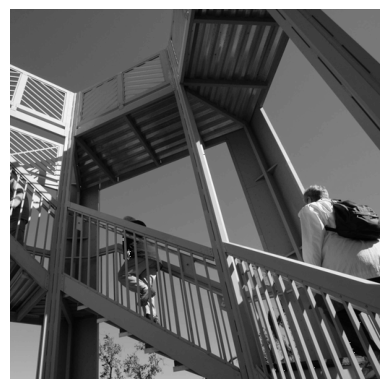

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_img)


In [ ]:
img=np.array(ascent_img)
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]], dtype=uint8)

In [ ]:
weight=1
horizontal_filter=[[-1,-2,-1],[0,0,0],[1,2,1]] #horizontal filter

gaussian_blur=[[1,2,1],[2,4,2],[1,2,1]]
motion_blur=[[1,0,0],[0,1,0],[0,0,1]]
motion_blur_weight=1/2
vertical_filter=[[-1,0,1],[-2,0,2],[-1,0,1]]

blur=[[0,0.2,0],[0.2,0.2,0.2],[0,0.2,0]]
gaussian_blur_weight=1/16

sharpen_filter=[[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]

detect_edge_all_dir=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]


In [ ]:
def corr_2d(X,K,weight):
    h,w=K.shape
    Y=torch.zeros([X.shape[0]-h+1,X.shape[1]-w+1])
    print("shape of input: ",X.shape)
    print("shape of kernel: ",K.shape)
    print("shape of output: ",Y.shape)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j]=(X[i:i+h,j:j+w]*K).sum()*weight
    return Y

shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


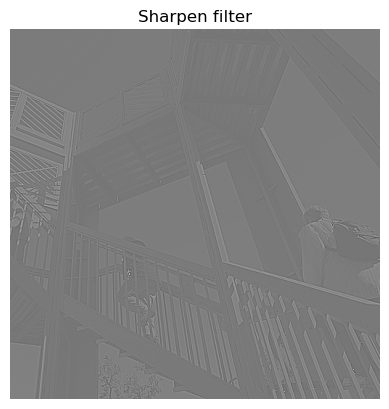

In [ ]:
Y=corr_2d(img,np.array(sharpen_filter),1)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Sharpen filter')
plt.imshow(Y)


shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


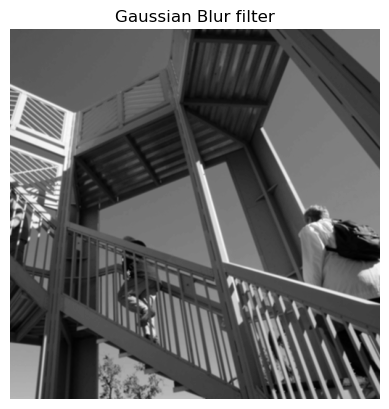

In [ ]:
Y=corr_2d(img,np.array(gaussian_blur),1/16)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Gaussian Blur filter')
plt.imshow(Y)

shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


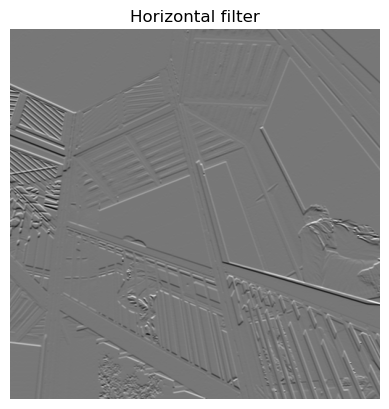

In [ ]:
Y=corr_2d(img,np.array(horizontal_filter),1)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Horizontal filter')
plt.imshow(Y)


shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


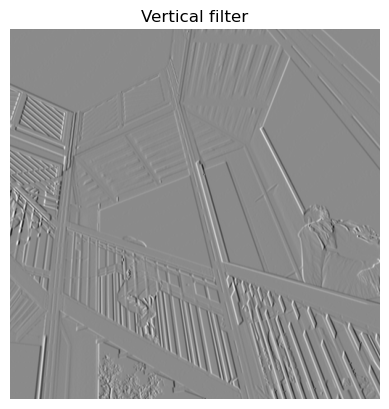

In [ ]:
Y=corr_2d(img,np.array(vertical_filter),1)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Vertical filter')
plt.imshow(Y)


shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


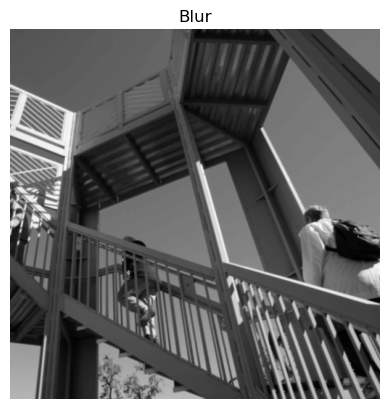

In [ ]:
Y=corr_2d(img,np.array(blur),1)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Blur')
plt.imshow(Y)


shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


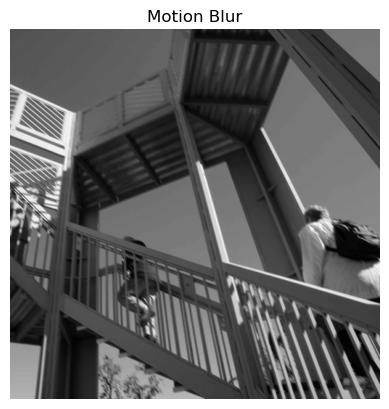

In [ ]:
Y=corr_2d(img,np.array(motion_blur),1/3)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Motion Blur')
plt.imshow(Y)


shape of input:  (512, 512)
shape of kernel:  (3, 3)
shape of output:  torch.Size([510, 510])


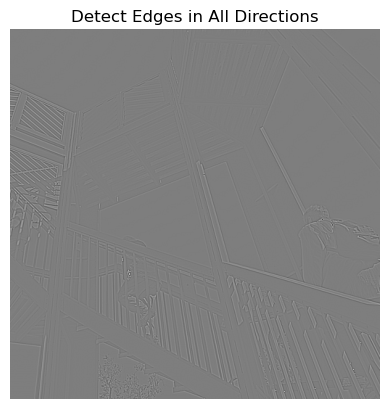

In [ ]:
Y=corr_2d(img,np.array(detect_edge_all_dir),1)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title('Detect Edges in All Directions')
plt.imshow(Y)
